In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import PIL.Image
from matplotlib import pyplot as plt
import paddle

from ppgan.apps import StyleGANv2ClipPredictor
from ppgan.apps import Pixel2Style2PixelPredictor
seed =1234

c:\Users\ultrax\anaconda3\envs\pd\lib\site-packages\sklearn\linear_model\_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\Users\ultrax\anaconda3\envs\pd\lib\site-packages\sklearn\linear_model\_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [16]:
G = StyleGANv2ClipPredictor('ffhq-config-f')

[05/26 17:09:15] ppgan INFO: Found C:\Users\ultrax\.cache\ppgan\stylegan2-ffhq-config-f.pdparams


In [4]:
predictor = Pixel2Style2PixelPredictor(
    output_path='./tmp',
    model_type='ffhq-inversion',
    seed=seed)

[05/26 17:04:27] ppgan INFO: Found C:\Users\ultrax\.cache\ppgan\pSp-ffhq-inversion.pdparams


In [5]:
img_res = [predictor.run('docs/imgs/pSp-input.jpg')]

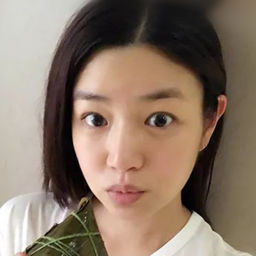

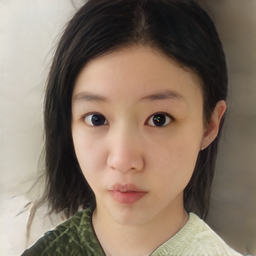

In [6]:
src_imgs = []
dst_imgs = []
latents = []
num = len(img_res)
for i, res in enumerate(img_res):
    src_imgs.append(res[0])
    dst_imgs.append(res[1])
    latents.append(res[2])


imgs_ = np.stack(src_imgs) #BHWC
imgs_ = imgs_.transpose(1,0,2,3)
H,B,W,C = imgs_.shape
imgs_ = imgs_.reshape(H, B*W, 3)
display(PIL.Image.fromarray(imgs_, 'RGB').resize((256,B*256),PIL.Image.LANCZOS))

imgs_ = np.stack(dst_imgs).astype(np.uint8) #BHWC
imgs_ = imgs_.transpose(1,0,2,3)
H,B,W,C = imgs_.shape
imgs_ = imgs_.reshape(H, B*W, 3)

display(PIL.Image.fromarray(imgs_, 'RGB').resize((256,B*256),PIL.Image.LANCZOS))

In [7]:
# prompt engineering
templates = [
    'a bad photo of a {}.',
    'a photo of the hard to see {}.',
    'a low resolution photo of the {}.',
    'a rendering of a {}.',
    'graffiti of a {}.',
    'a bad photo of the {}.',
    'a cropped photo of the {}.',
    'a photo of a hard to see {}.',
    'a bright photo of a {}.',
    'a photo of a clean {}.',
    'a photo of a dirty {}.',
    'a dark photo of the {}.',
    'a drawing of a {}.',
    'a photo of my {}.',
    'a photo of the cool {}.',
    'a close-up photo of a {}.',
    'a black and white photo of the {}.',
    'a painting of the {}.',
    'a painting of a {}.',
    'a pixelated photo of the {}.',
    'a sculpture of the {}.',
    'a bright photo of the {}.',
    'a cropped photo of a {}.',
    'a jpeg corrupted photo of a {}.',
    'a blurry photo of the {}.',
    'a photo of the {}.',
    'a good photo of the {}.',
    'a rendering of the {}.',
    'a close-up photo of the {}.',
    'a photo of a {}.',
    'a low resolution photo of a {}.',
    'a photo of the clean {}.',
    'a photo of a large {}.',
    'a photo of a nice {}.',
    'a blurry photo of a {}.',
    'a cartoon {}.',
    'art of a {}.',
    'a good photo of a {}.',
    'a photo of the nice {}.',
    'a photo of the small {}.',
    'a photo of the weird {}.',
    'art of the {}.',
    'a drawing of the {}.',
    'a photo of the large {}.',
    'a dark photo of a {}.',
    'graffiti of the {}.',
]

In [8]:
latent = paddle.to_tensor(np.stack(latents)).astype('float32')

In [23]:
# text direction : neutral -> target
neutral = 'head with black hair'
target = 'head with gold hair'

# beta_threshold : Determines the degree of disentanglement, # channels manipulated
beta_threshold = 0.1

delta_s = G.get_delta_s(neutral, target, beta_threshold, relative=False, soft_threshold=0)

max delta_s is 0.4528255760669708
302 channels will be manipulated under the beta threshold 0.1


In [21]:
# alpha_threshold : Determines the degree of manipulation
lst_alpha = [ -1, 0, 1, 2, 3, 4, 5] #[-5, -2.5, 0, 2.5, 5] #[-5, -3, -1, 0, 1, 3, 5]
all_imgs, styles = G.gengrate(latent, delta_s, lst_alpha)

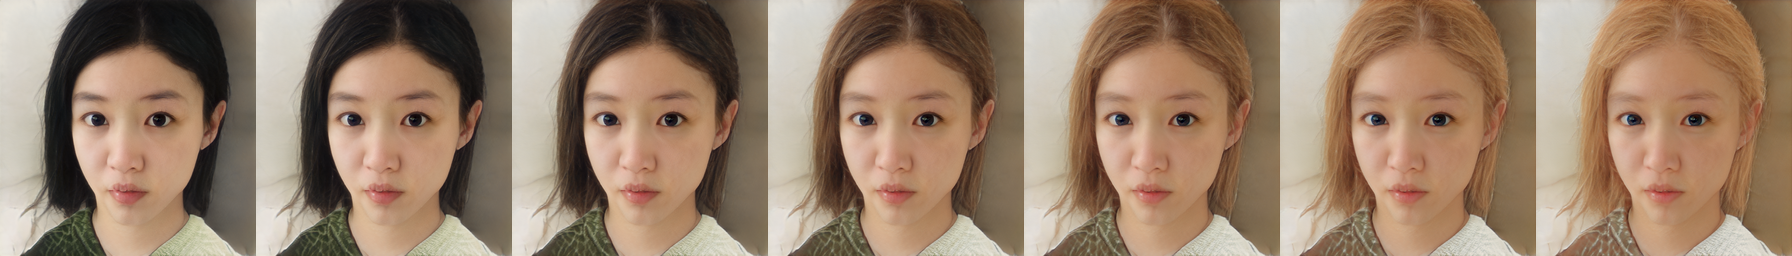

In [22]:
# visualize
lst = []
for imgs in all_imgs:
    lst.append((imgs.transpose((0,2,3,1))*127.5+128).clip(0,255).astype(paddle.uint8).numpy())

H,W = (256, 256)

imgs_ = []
for img in lst:
    imgs_.append( np.asarray( PIL.Image.fromarray(img[0], 'RGB').resize((H,W),PIL.Image.LANCZOS)))
imgs_ = np.stack(imgs_) #BHWC
imgs_ = imgs_.transpose(1,0,2,3)#HBWC
imgs_ = imgs_.reshape(H, -1, 3)
display(PIL.Image.fromarray(imgs_, 'RGB'))

In [249]:
# test image dir path
imgdir = 'samples'

img_res = []
for img in os.listdir(imgdir):
    img_res.append(predictor.run(os.path.join(imgdir,img)))

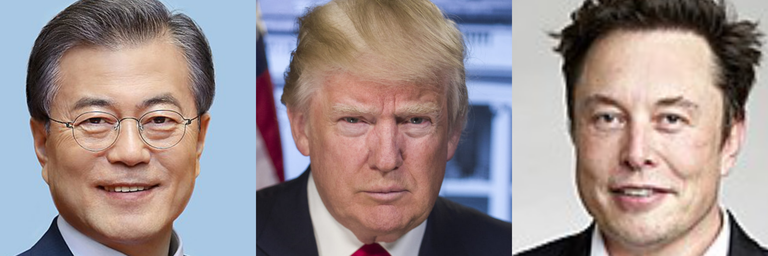

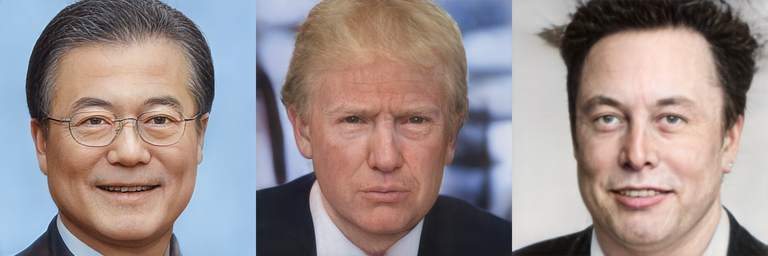

In [255]:
src_imgs = []
dst_imgs = []
latents = []
num = len(img_res)
for i, res in enumerate(img_res):
    src_imgs.append(res[0])
    dst_imgs.append(res[1])
    latents.append(res[2])


imgs_ = np.stack(src_imgs) #BHWC
imgs_ = imgs_.transpose(1,0,2,3)
H,B,W,C = imgs_.shape
imgs_ = imgs_.reshape(H, B*W, 3)
display(PIL.Image.fromarray(imgs_, 'RGB').resize((B*256,256),PIL.Image.LANCZOS))

imgs_ = np.stack(dst_imgs).astype(np.uint8) #BHWC
imgs_ = imgs_.transpose(1,0,2,3)
H,B,W,C = imgs_.shape
imgs_ = imgs_.reshape(H, B*W, 3)

display(PIL.Image.fromarray(imgs_, 'RGB').resize((B*256,256),PIL.Image.LANCZOS))

In [251]:
latent = paddle.to_tensor(np.stack(latents)).astype('float32')

In [252]:
# text direction : neutral -> target
neutral = 'head'
target = 'head with long brown curl hair'

# beta_threshold : Determines the degree of disentanglement, # channels manipulated
beta_threshold = 0.10

delta_s = G.get_delta_s(neutral, target, beta_threshold)

max delta_s is 0.27525776624679565
313 channels will be manipulated under the beta threshold 0.1


In [253]:
# alpha_threshold : Determines the degree of manipulation
lst_alpha = [-5, -2, 0, 2, 5]
all_imgs, styles = G.gengrate(latent, delta_s, lst_alpha)

-5


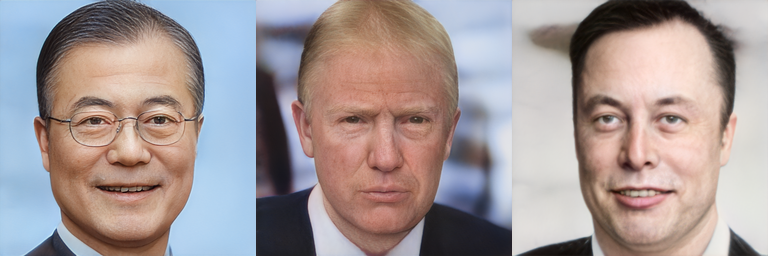

-2


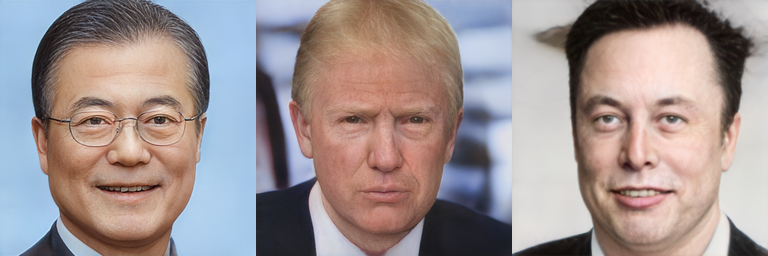

0


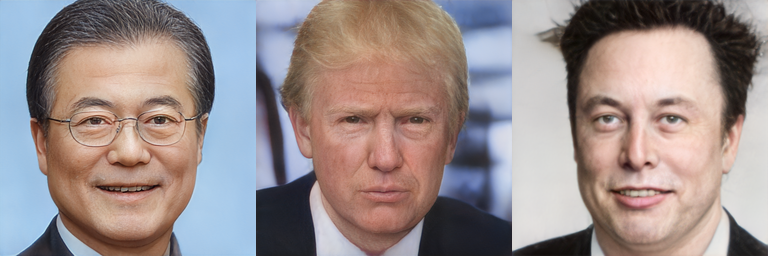

2


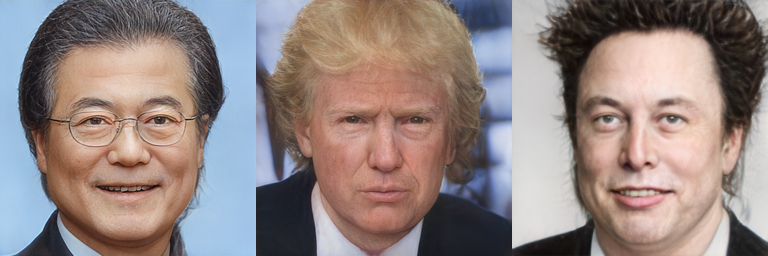

5


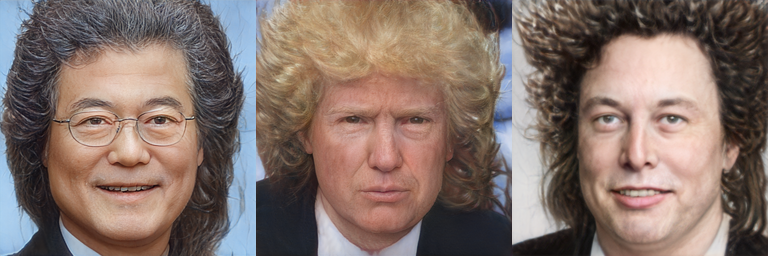

In [254]:
# visualize
lst = []
for imgs in all_imgs:
    lst.append((imgs.transpose((0,2,3,1))*127.5+128).clip(0,255).astype(paddle.uint8).numpy())

H,W = (256, 256)
gw, gh = (all_imgs[0].shape[0], 1)

for i, alpha in enumerate(lst_alpha):
    print(alpha)
    imgs = lst[i]
    imgs_ = []
    for img in imgs:
        imgs_.append( np.asarray( PIL.Image.fromarray(img, 'RGB').resize((H,W),PIL.Image.LANCZOS)))
    imgs_ = np.stack(imgs_)
    imgs_ = imgs_.reshape(gh,gw,H,W,3)
    imgs_ = imgs_.transpose(0,2,1,3,4)
    imgs_ = imgs_.reshape(gh*H, gw*W, 3)
    display(PIL.Image.fromarray(imgs_, 'RGB'))